# Hipótesis
Podemos predecir cuántas medallas ganará un país en los Juegos Olímpicos utilizando datos históricos.
Los datos
Un conjunto de datos de cuántas medallas ganó cada país en cada Olimpiada. Otros datos también estarían bien (número de atletas, etc.).

In [1]:
import pandas as pd

In [2]:
teams = pd.read_csv('teams.csv')

In [3]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [6]:
teams = teams[['team','country','year','athletes','age','prev_medals','medals']]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [7]:
teams.corr()['medals']

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [8]:
import seaborn as sns

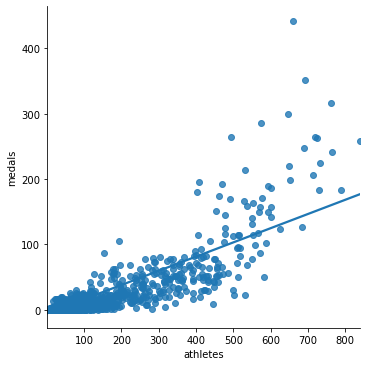

In [10]:
sns.lmplot(x='athletes', y='medals', data=teams, fit_reg=True, ci=None)

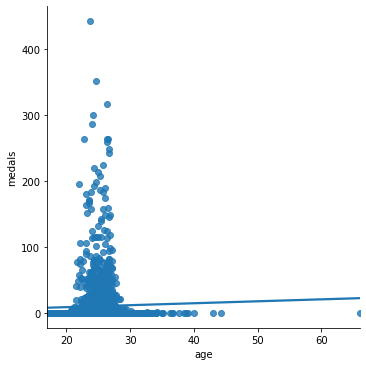

In [11]:
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True, ci=None)
#Aque podemos ver que la edad no hay una relacion lineal con las medallas

<AxesSubplot:ylabel='Frequency'>

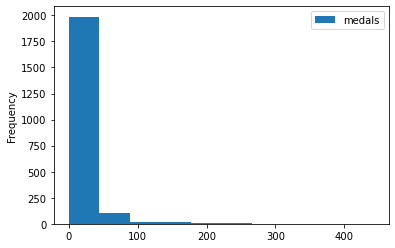

In [12]:
teams.plot.hist(y='medals')
#aqui muestra los paises cuantas medallas han ganado

In [13]:
teams[teams.isnull().any(axis=1)].head(20)

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


In [14]:
teams = teams.dropna()

In [15]:
teams.shape

(2014, 7)

In [16]:
train = teams[teams['year'] < 2012].copy()
test = teams[teams['year'] >= 2012].copy()

In [17]:
# Alrededor del 80% de los datos
train.shape

(1609, 7)

# Métrica de precisión
Usaremos el error cuadrático medio. Esta es una buena métrica de precisión de regresión predeterminada. Es el promedio de las diferencias al cuadrado entre los resultados reales y sus predicciones.

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [19]:
predictors = ['athletes', 'prev_medals']

In [20]:
reg.fit(train[predictors], train['medals'])

LinearRegression()

In [21]:
predictions = reg.predict(test[predictors])

In [22]:
predictions.shape

(405,)

In [23]:
test['predictions'] = predictions

In [25]:
test.loc[test['predictions'] < 0, 'predictions'] = 0

In [26]:
test['predictions'] = test['predictions'].round()

In [27]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['medals'], test['predictions'])
error

3.2987654320987656

In [28]:
teams.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [29]:
test['predictions'] = predictions

In [30]:
test[test['team'] == 'USA']

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.210121
2054,USA,United States,2016,719,26.4,248.0,264,235.568076


In [31]:
test[test['team'] == 'IND']

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,6.921667
908,IND,India,2016,130,26.1,6.0,2,11.683176


In [32]:
errors = (test['medals'] - predictions).abs()

In [33]:
error_by_team = errors.groupby(test['team']).mean()
medals_by_team = test['medals'].groupby(test['team']).mean()
error_ratio = error_by_team / medals_by_team

In [34]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

<AxesSubplot:ylabel='Frequency'>

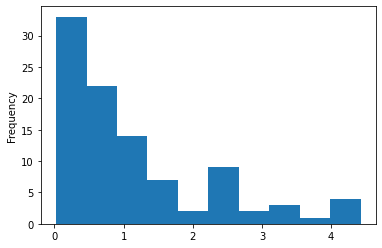

In [36]:
error_ratio.plot.hist()

In [37]:
error_ratio.sort_values()

team
FRA    0.024289
CAN    0.050844
NZL    0.071349
RUS    0.081841
ITA    0.119537
         ...   
PHI    3.563248
JOR    4.065175
BDI    4.136878
AUT    4.257950
NIG    4.423693
Name: medals, Length: 97, dtype: float64